In [1]:
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
df = pd.read_csv('../data/time_series_sales.csv')
df.head()

,Month,Sales
0,1-01,266.0
1,1-02,145.9
2,1-03,183.1
3,1-04,119.3
4,1-05,180.3


In [4]:
def parser(x):
    return pd.datetime.strptime('200'+x,'%Y-%m')

df = pd.read_csv('../data/time_series_sales.csv', header=0, parse_dates=[0], index_col=0,squeeze=True, date_parser=parser)
df.head()

Month
2001-01-01    266.0
2001-02-01    145.9
2001-03-01    183.1
2001-04-01    119.3
2001-05-01    180.3
Name: Sales, dtype: float64

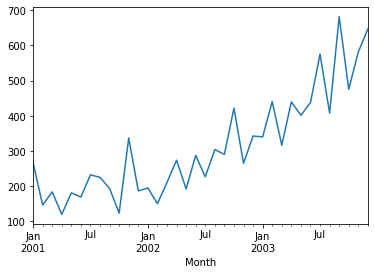

In [5]:
df.plot()
plt.show()

In [6]:
upsampled = df.resample('D').asfreq()
interpolated = upsampled.interpolate(method='linear')
poly_interpolated = upsampled.interpolate(method='spline', order=2)

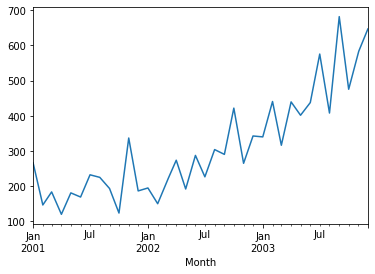

In [8]:
interpolated.plot()
plt.show()

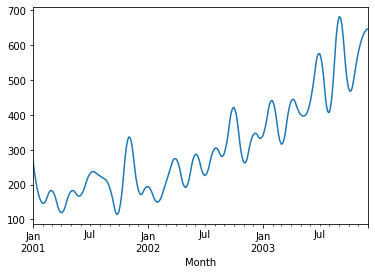

In [9]:
poly_interpolated.plot()
plt.show()

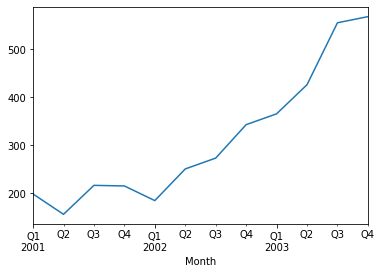

In [10]:
Q_resample = df.resample('Q')
quarterly_mean_sales = Q_resample.mean()
quarterly_mean_sales.plot()
plt.show()

In [12]:
Q_resample.asfreq()

Month
2001-03-31   NaN
2001-06-30   NaN
2001-09-30   NaN
2001-12-31   NaN
2002-03-31   NaN
2002-06-30   NaN
2002-09-30   NaN
2002-12-31   NaN
2003-03-31   NaN
2003-06-30   NaN
2003-09-30   NaN
2003-12-31   NaN
Freq: Q-DEC, Name: Sales, dtype: float64

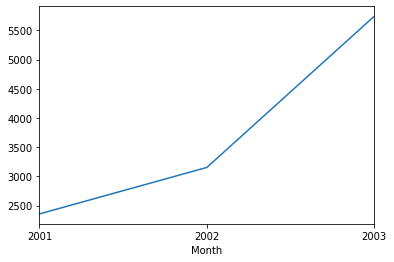

In [13]:
Y_resample = df.resample('A')
annual_mean_sales = Y_resample.sum()
annual_mean_sales.plot()
plt.show()

In [16]:
df.resample?